In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load Data & Basic Overview

- Load the dataset
- Show shape (rows & columns)
- Display first 5 rows
- Check data types
- Check for missing values

In [3]:
df=pd.read_csv('../01_Data/02_Processed/LoanDefault_Cleaned.csv')


In [4]:
df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,loan_age_months,days_since_last_payment,days_since_last_credit_pull,credit_history_length
0,3600.0,36 months,13.99,123.03,C,10+ years,MORTGAGE,55000.0,Not Verified,Fully Paid,...,178050.0,7746.0,2400.0,13734.0,Cash,N,150.0,-1.0,-60.0,187.0
1,24700.0,36 months,11.99,820.28,C,10+ years,MORTGAGE,65000.0,Not Verified,Fully Paid,...,314017.0,39475.0,79300.0,24667.0,Cash,N,194.0,943.0,-60.0,232.0
2,20000.0,60 months,10.78,432.66,B,10+ years,MORTGAGE,63000.0,Not Verified,Fully Paid,...,218418.0,18696.0,6200.0,14877.0,Cash,N,186.0,578.0,-60.0,224.0
3,35000.0,60 months,14.85,829.90,C,10+ years,MORTGAGE,110000.0,Source Verified,Current,...,381215.0,52226.0,62500.0,18000.0,Cash,N,88.0,-32.0,-60.0,125.0
4,10400.0,60 months,22.45,289.91,F,3 years,MORTGAGE,104433.0,Source Verified,Fully Paid,...,439570.0,95768.0,20300.0,88097.0,Cash,N,213.0,913.0,305.0,250.0


In [5]:
df.shape

(2260701, 92)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 92 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   loan_amnt                       float64
 1   term                            object 
 2   int_rate                        float64
 3   installment                     float64
 4   grade                           object 
 5   emp_length                      object 
 6   home_ownership                  object 
 7   annual_inc                      float64
 8   verification_status             object 
 9   loan_status                     object 
 10  purpose                         object 
 11  addr_state                      object 
 12  dti                             float64
 13  delinq_2yrs                     float64
 14  fico_range_low                  float64
 15  fico_range_high                 float64
 16  inq_last_6mths                  float64
 17  mths_since_last_delinq     

In [7]:
df.isnull().sum()

loan_amnt                      0
term                           0
int_rate                       0
installment                    0
grade                          0
                              ..
debt_settlement_flag           0
loan_age_months                0
days_since_last_payment        0
days_since_last_credit_pull    0
credit_history_length          0
Length: 92, dtype: int64

## 2. Statistical Summary

- Summary of numerical columns using `describe()`
- Helps understand:
  - Mean, median
  - Std deviation
  - Min & max values
  - Potential outliers

In [8]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_age_months,days_since_last_payment,days_since_last_credit_pull,credit_history_length
count,2.260701e+06,2.260701e+06,2.260701e+06,2.260701e+06,2.260701e+06,2.260701e+06,2.260701e+06,2.260701e+06,2.260701e+06,2.260701e+06,...,2.260701e+06,2.260701e+06,2.260701e+06,2.260701e+06,2.260701e+06,2.260701e+06,2.260701e+06,2.260701e+06,2.260701e+06,2.260701e+06
mean,1.504690e+04,1.309282e+01,4.458058e+02,7.799222e+04,1.882344e+01,3.068707e-01,6.985881e+02,7.025883e+02,5.768193e-01,3.272631e+01,...,1.281142e-01,4.676824e-02,1.762541e+05,5.073154e+04,2.304111e+04,4.338879e+04,1.991197e+02,3.772857e+02,1.191000e+02,2.315391e+02
std,9.190182e+03,4.832103e+00,2.671717e+02,1.126953e+05,1.417788e+01,8.672199e-01,3.301015e+01,3.301102e+01,8.859560e-01,1.539377e+01,...,3.645142e-01,3.775225e-01,1.790733e+05,4.939347e+04,2.277300e+04,4.440789e+04,9.350450e+01,5.567090e+02,3.544927e+02,9.553733e+01
min,5.000000e+02,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,6.140000e+02,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,-6.000000e+01,-9.100000e+01,3.800000e+01
25%,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.190000e+01,0.000000e+00,6.750000e+02,6.790000e+02,0.000000e+00,3.100000e+01,...,0.000000e+00,0.000000e+00,5.200400e+04,2.126100e+04,8.500000e+03,1.548800e+04,1.370000e+02,-6.000000e+01,-6.000000e+01,1.660000e+02
50%,1.290000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,6.900000e+02,6.940000e+02,0.000000e+00,3.100000e+01,...,0.000000e+00,0.000000e+00,1.142985e+05,3.786400e+04,1.630000e+04,3.269600e+04,1.800000e+02,1.520000e+02,-6.000000e+01,2.160000e+02
75%,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.448000e+01,0.000000e+00,7.150000e+02,7.190000e+02,1.000000e+00,3.100000e+01,...,0.000000e+00,0.000000e+00,2.521970e+05,6.347100e+04,2.990000e+04,5.760100e+04,2.460000e+02,6.700000e+02,1.520000e+02,2.820000e+02
max,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,8.500000e+02,3.300000e+01,2.260000e+02,...,1.200000e+01,8.500000e+01,9.999999e+06,3.408095e+06,1.569000e+06,2.118996e+06,1.013000e+03,4.048000e+03,4.262000e+03,1.045000e+03


## 3. Univariate Analysis

### For Numerical Columns:
- Plot histograms
- Check skewness
- Identify zero-heavy columns

### For Categorical Columns:
- Value counts
- Bar charts

In [9]:
num_cols = []
for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'Int32':
        num_cols.append(col)

In [10]:
len(num_cols)

80

In [11]:
cat_cols = []
for col in df.columns:
    if df[col].dtype == 'category' or df[col].dtype == 'object':
        cat_cols.append(col)

In [12]:
len(cat_cols)

12

In [13]:
num_cols

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'last_pymnt_amnt',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 

In [14]:
int_cols = [
    'loan_amnt',
    'delinq_2yrs',
    'fico_range_low',
    'fico_range_high',
    'inq_last_6mths',
    'mths_since_last_delinq',
    'open_acc',
    'pub_rec',
    'total_acc',
    'last_fico_range_high',
    'last_fico_range_low',
    'collections_12_mths_ex_med',
    'tot_coll_amt',
    'tot_cur_bal',
    'open_acc_6m',
    'open_act_il',
    'open_il_12m',
    'open_il_24m',
    'mths_since_rcnt_il',
    'open_rv_12m',
    'open_rv_24m',
    'max_bal_bc',
    'total_rev_hi_lim',
    'inq_fi',
    'total_cu_tl',
    'inq_last_12m',
    'acc_open_past_24mths',
    'avg_cur_bal',
    'bc_open_to_buy',
    'mo_sin_old_il_acct',
    'mo_sin_old_rev_tl_op',
    'mo_sin_rcnt_rev_tl_op',
    'mo_sin_rcnt_tl',
    'mort_acc',
    'mths_since_recent_bc',
    'mths_since_recent_bc_dlq',
    'mths_since_recent_inq',
    'mths_since_recent_revol_delinq',
    'num_accts_ever_120_pd',
    'num_actv_bc_tl',
    'num_actv_rev_tl',
    'num_bc_sats',
    'num_bc_tl',
    'num_il_tl',
    'num_op_rev_tl',
    'num_rev_accts',
    'num_rev_tl_bal_gt_0',
    'num_sats',
    'num_tl_120dpd_2m',
    'num_tl_30dpd',
    'num_tl_90g_dpd_24m',
    'num_tl_op_past_12m',
    'pub_rec_bankruptcies',
    'tax_liens',
    'total_bal_ex_mort',
    'total_bc_limit',
    'total_il_high_credit_limit',
    'loan_age_months',
    'days_since_last_payment',
    'days_since_last_credit_pull',
    'credit_history_length'
]


In [15]:
float_cols = [
    'int_rate',
    'installment',
    'annual_inc',
    'dti',
    'revol_bal',
    'revol_util',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee',
    'last_pymnt_amnt',
    'total_bal_il',
    'il_util',
    'all_util',
    'pct_tl_nvr_dlq',
    'percent_bc_gt_75',
    'tot_hi_cred_lim'
]


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 92 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   loan_amnt                       float64
 1   term                            object 
 2   int_rate                        float64
 3   installment                     float64
 4   grade                           object 
 5   emp_length                      object 
 6   home_ownership                  object 
 7   annual_inc                      float64
 8   verification_status             object 
 9   loan_status                     object 
 10  purpose                         object 
 11  addr_state                      object 
 12  dti                             float64
 13  delinq_2yrs                     float64
 14  fico_range_low                  float64
 15  fico_range_high                 float64
 16  inq_last_6mths                  float64
 17  mths_since_last_delinq     

In [17]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

In [18]:

num_cols = df.select_dtypes(include=['int64','float64','int32','float32']).columns

df[num_cols] = df[num_cols].apply(pd.to_numeric, downcast='integer')
df[num_cols] = df[num_cols].apply(pd.to_numeric, downcast='float')


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 92 columns):
 #   Column                          Dtype   
---  ------                          -----   
 0   loan_amnt                       float32 
 1   term                            category
 2   int_rate                        float32 
 3   installment                     float32 
 4   grade                           category
 5   emp_length                      category
 6   home_ownership                  category
 7   annual_inc                      float64 
 8   verification_status             category
 9   loan_status                     category
 10  purpose                         category
 11  addr_state                      category
 12  dti                             float32 
 13  delinq_2yrs                     int8    
 14  fico_range_low                  int16   
 15  fico_range_high                 int16   
 16  inq_last_6mths                  int8    
 17  mths_sin

In [20]:
# INT columns
int_cols = df.select_dtypes(include=['Int8', 'Int16', 'Int32', 'int8', 'int16', 'int32']).columns.tolist()

# FLOAT columns
float_cols = df.select_dtypes(include=['float32', 'Float32', 'float64']).columns.tolist()

# ALL NUMERIC columns
num_cols = int_cols + float_cols

# CATEGORICAL columns
cat_cols = df.select_dtypes(include=['category', 'object']).columns.tolist()



In [21]:
cat_cols

['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'addr_state',
 'initial_list_status',
 'application_type',
 'disbursement_method',
 'debt_settlement_flag']

In [22]:
len(num_cols)

80

In [23]:
df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,loan_age_months,days_since_last_payment,days_since_last_credit_pull,credit_history_length
0,3600.0,36 months,13.990000,123.029999,C,10+ years,MORTGAGE,55000.0,Not Verified,Fully Paid,...,178050.0,7746.0,2400.0,13734.0,Cash,N,150,-1,-60,187
1,24700.0,36 months,11.990000,820.280029,C,10+ years,MORTGAGE,65000.0,Not Verified,Fully Paid,...,314017.0,39475.0,79300.0,24667.0,Cash,N,194,943,-60,232
2,20000.0,60 months,10.780000,432.660004,B,10+ years,MORTGAGE,63000.0,Not Verified,Fully Paid,...,218418.0,18696.0,6200.0,14877.0,Cash,N,186,578,-60,224
3,35000.0,60 months,14.850000,829.900024,C,10+ years,MORTGAGE,110000.0,Source Verified,Current,...,381215.0,52226.0,62500.0,18000.0,Cash,N,88,-32,-60,125
4,10400.0,60 months,22.450001,289.910004,F,3 years,MORTGAGE,104433.0,Source Verified,Fully Paid,...,439570.0,95768.0,20300.0,88097.0,Cash,N,213,913,305,250


In [24]:
if 'term' in df.columns:
    df['term'] = df['term'].astype(str).str.extract('(\d+)').astype('Int32')

In [25]:
df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,loan_age_months,days_since_last_payment,days_since_last_credit_pull,credit_history_length
0,3600.0,36,13.990000,123.029999,C,10+ years,MORTGAGE,55000.0,Not Verified,Fully Paid,...,178050.0,7746.0,2400.0,13734.0,Cash,N,150,-1,-60,187
1,24700.0,36,11.990000,820.280029,C,10+ years,MORTGAGE,65000.0,Not Verified,Fully Paid,...,314017.0,39475.0,79300.0,24667.0,Cash,N,194,943,-60,232
2,20000.0,60,10.780000,432.660004,B,10+ years,MORTGAGE,63000.0,Not Verified,Fully Paid,...,218418.0,18696.0,6200.0,14877.0,Cash,N,186,578,-60,224
3,35000.0,60,14.850000,829.900024,C,10+ years,MORTGAGE,110000.0,Source Verified,Current,...,381215.0,52226.0,62500.0,18000.0,Cash,N,88,-32,-60,125
4,10400.0,60,22.450001,289.910004,F,3 years,MORTGAGE,104433.0,Source Verified,Fully Paid,...,439570.0,95768.0,20300.0,88097.0,Cash,N,213,913,305,250


In [26]:
# Sample numeric summary
sample_summary = df[num_cols].sample(5000, random_state=42).describe().T
sample_summary['skew'] = df[num_cols].sample(5000, random_state=42).skew()
sample_summary['zero_count'] = (df[num_cols].sample(5000, random_state=42) == 0).sum()
sample_summary


,count,mean,std,min,25%,50%,75%,max,skew,zero_count
delinq_2yrs,5000.0,0.305200,0.864987,0.0,0.00,0.0,0.000000,12.0,5.146364,4075
fico_range_low,5000.0,698.648000,32.978472,660.0,675.00,690.0,715.000000,840.0,1.193065,0
fico_range_high,5000.0,702.648000,32.978472,664.0,679.00,694.0,719.000000,844.0,1.193065,0
inq_last_6mths,5000.0,0.565400,0.877426,0.0,0.00,0.0,1.000000,6.0,1.846010,3104
mths_since_last_delinq,5000.0,32.856000,15.766781,0.0,31.00,31.0,31.000000,133.0,1.030266,4
...,...,...,...,...,...,...,...,...,...,...
percent_bc_gt_75,5000.0,42.239498,35.563644,0.0,0.00,37.5,66.699997,100.0,0.328683,1332
tot_hi_cred_lim,5000.0,176055.187500,186567.390625,500.0,50880.25,114298.5,253294.000000,4317023.0,4.373618,0
total_bal_ex_mort,5000.0,51188.742188,53043.230469,0.0,21120.75,37864.0,65251.000000,1508205.0,6.678638,1
total_bc_limit,5000.0,23014.232422,31414.363281,0.0,8375.00,16300.0,29000.000000,1569000.0,24.803690,63


In [27]:
for col in cat_cols:
    print(df[col].value_counts())

term
36    1609787
60     650914
Name: count, dtype: Int64
grade
B    663590
C    650053
A    433027
D    324424
E    135639
F     41800
G     12168
Name: count, dtype: int64
emp_length
10+ years    894945
2 years      203677
< 1 year     189988
3 years      180753
1 year       148403
5 years      139698
4 years      136605
6 years      102628
7 years       92695
8 years       91914
9 years       79395
Name: count, dtype: int64
home_ownership
MORTGAGE    1111483
RENT         894929
OWN          253057
ANY             996
OTHER           182
NONE             54
Name: count, dtype: int64
verification_status
Source Verified    886264
Not Verified       744806
Verified           629631
Name: count, dtype: int64
loan_status
Fully Paid                                             1076784
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period    

In [28]:
df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,loan_age_months,days_since_last_payment,days_since_last_credit_pull,credit_history_length
0,3600.0,36,13.990000,123.029999,C,10+ years,MORTGAGE,55000.0,Not Verified,Fully Paid,...,178050.0,7746.0,2400.0,13734.0,Cash,N,150,-1,-60,187
1,24700.0,36,11.990000,820.280029,C,10+ years,MORTGAGE,65000.0,Not Verified,Fully Paid,...,314017.0,39475.0,79300.0,24667.0,Cash,N,194,943,-60,232
2,20000.0,60,10.780000,432.660004,B,10+ years,MORTGAGE,63000.0,Not Verified,Fully Paid,...,218418.0,18696.0,6200.0,14877.0,Cash,N,186,578,-60,224
3,35000.0,60,14.850000,829.900024,C,10+ years,MORTGAGE,110000.0,Source Verified,Current,...,381215.0,52226.0,62500.0,18000.0,Cash,N,88,-32,-60,125
4,10400.0,60,22.450001,289.910004,F,3 years,MORTGAGE,104433.0,Source Verified,Fully Paid,...,439570.0,95768.0,20300.0,88097.0,Cash,N,213,913,305,250


In [29]:
def cap_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        df[col] = df[col].clip(lower, upper)
    return df

df = cap_outliers_iqr(df, num_cols)

In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 92 columns):
 #   Column                          Dtype   
---  ------                          -----   
 0   loan_amnt                       float32 
 1   term                            Int32   
 2   int_rate                        float32 
 3   installment                     float64 
 4   grade                           category
 5   emp_length                      category
 6   home_ownership                  category
 7   annual_inc                      float64 
 8   verification_status             category
 9   loan_status                     category
 10  purpose                         category
 11  addr_state                      category
 12  dti                             float64 
 13  delinq_2yrs                     int8    
 14  fico_range_low                  int16   
 15  fico_range_high                 int16   
 16  inq_last_6mths                  float64 
 17  mths_sin

In [31]:
df.shape

(2260701, 92)

In [32]:
def count_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Count how many outliers
    count = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    return count


In [34]:
outlier_report = {}

for col in num_cols:
    outlier_report[col] = count_outliers(df, col)

outlier_report

{'delinq_2yrs': 0,
 'fico_range_low': 0,
 'fico_range_high': 0,
 'inq_last_6mths': 0,
 'mths_since_last_delinq': 0,
 'open_acc': 0,
 'pub_rec': 0,
 'total_acc': 0,
 'last_fico_range_high': 0,
 'last_fico_range_low': 0,
 'collections_12_mths_ex_med': 0,
 'open_acc_6m': 0,
 'open_act_il': 0,
 'open_il_12m': 0,
 'open_il_24m': 0,
 'mths_since_rcnt_il': 0,
 'il_util': 0,
 'open_rv_12m': 0,
 'open_rv_24m': 0,
 'all_util': 0,
 'inq_fi': 0,
 'total_cu_tl': 0,
 'inq_last_12m': 0,
 'acc_open_past_24mths': 0,
 'mo_sin_old_il_acct': 0,
 'mo_sin_old_rev_tl_op': 0,
 'mo_sin_rcnt_rev_tl_op': 0,
 'mo_sin_rcnt_tl': 0,
 'mort_acc': 0,
 'mths_since_recent_bc': 0,
 'mths_since_recent_bc_dlq': 0,
 'mths_since_recent_inq': 0,
 'mths_since_recent_revol_delinq': 0,
 'num_accts_ever_120_pd': 0,
 'num_actv_bc_tl': 0,
 'num_actv_rev_tl': 0,
 'num_bc_sats': 0,
 'num_bc_tl': 0,
 'num_il_tl': 0,
 'num_op_rev_tl': 0,
 'num_rev_accts': 0,
 'num_rev_tl_bal_gt_0': 0,
 'num_sats': 0,
 'num_tl_120dpd_2m': 0,
 'num_tl_30

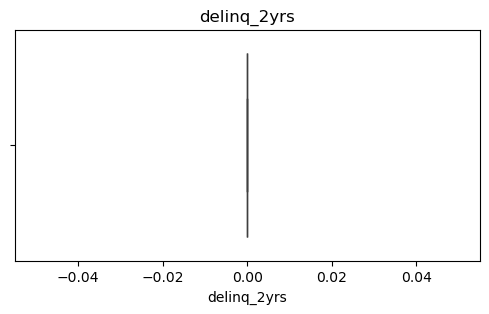

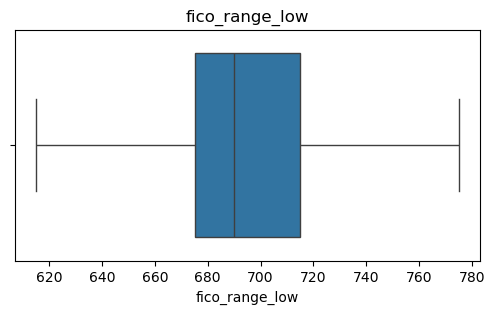

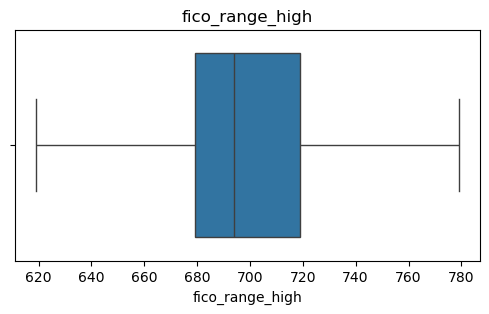

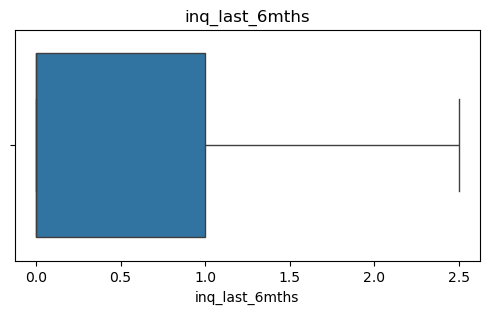

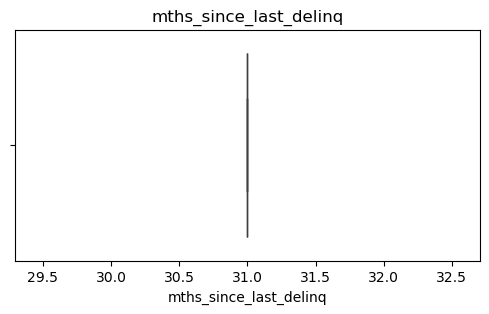

In [35]:
sample_cols = num_cols[:5]  # first 5 columns

for col in sample_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

In [36]:
from ydata_profiling import ProfileReport

profile = ProfileReport(
    df.sample(20000, random_state=42),
    minimal=True,
    explorative=False,
    title="Final Loan Data Profiling Report"
)

profile.to_file("final_loan_data_profile.html")



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


%|                              | 0/92 [00:00<?, ?it/s]
%|████▊                | 21/92 [00:00<00:00, 71.90it/s]
%|██████▌              | 29/92 [00:00<00:01, 55.25it/s]
%|████████▉            | 39/92 [00:00<00:00, 63.10it/s]
%|███████████▍         | 50/92 [00:00<00:00, 74.04it/s]
%|█████████████▍       | 59/92 [00:01<00:00, 62.80it/s]
%|███████████████      | 66/92 [00:01<00:00, 51.92it/s]
%|██████████████████▎  | 80/92 [00:01<00:00, 65.12it/s]
100%|█████████████████████| 92/92 [00:01<00:00, 65.74it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 6. Missing Value Treatment

### Strategy:
- Numerical → mean/median
- Categorical → mode / "Unknown"
- Optional: KNN Imputer for large datasets

In [39]:
# Fill numeric columns with median
df.loc[:, num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical columns with mode
df.loc[:, cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [40]:
engineered_cols = [
    "loan_age_months",
    "days_since_last_payment",
    "revol_util",
    "credit_history_length"
]

for col in engineered_cols:
    missing_count = df[col].isnull().sum()
    print(f"{col} → missing values: {missing_count}")


loan_age_months → missing values: 0
days_since_last_payment → missing values: 0
revol_util → missing values: 0
credit_history_length → missing values: 0


In [41]:
df[engineered_cols].describe()


,loan_age_months,days_since_last_payment,revol_util,credit_history_length
count,2.260701e+06,2.260701e+06,2.260701e+06,2.260701e+06
mean,1.969748e+02,3.662642e+02,5.033648e+01,2.297908e+02
std,8.709651e+01,5.199584e+02,2.467712e+01,9.024175e+01
min,6.000000e+00,-6.000000e+01,0.000000e+00,3.800000e+01
25%,1.370000e+02,-6.000000e+01,3.150000e+01,1.660000e+02
50%,1.800000e+02,1.520000e+02,5.030000e+01,2.160000e+02
75%,2.460000e+02,6.700000e+02,6.930000e+01,2.820000e+02
max,4.095000e+02,1.765000e+03,1.260000e+02,4.560000e+02


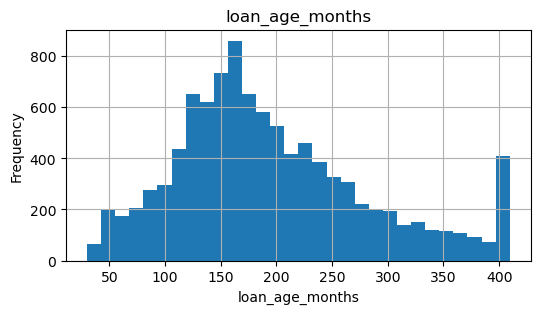

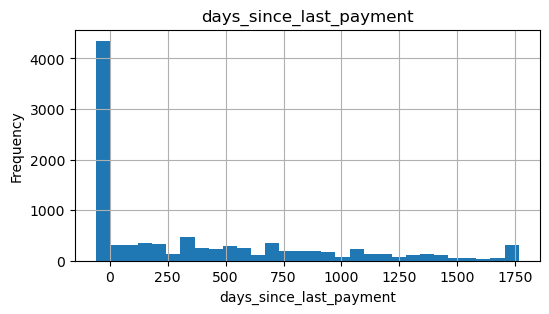

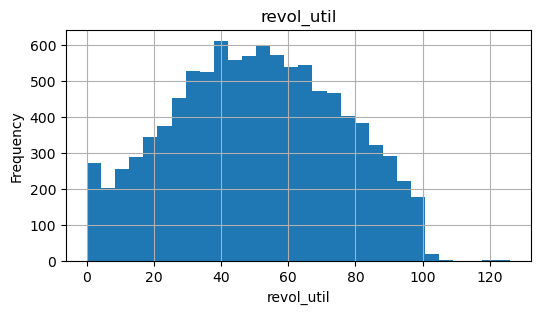

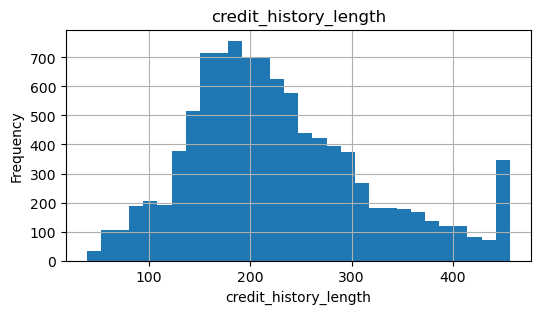

In [42]:

for col in engineered_cols:
    plt.figure(figsize=(6,3))
    df[col].sample(10000, random_state=42).hist(bins=30)  # sample 10k rows
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


In [43]:
for col in engineered_cols:
    skew = df[col].skew()
    print(f"{col} → skewness: {skew:.2f}")


loan_age_months → skewness: 0.67
days_since_last_payment → skewness: 1.12
revol_util → skewness: -0.01
credit_history_length → skewness: 0.62


In [50]:
df['days_since_last_payment_log'] = np.log1p(df['days_since_last_payment'])

C:\Users\gedal\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\gedal\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [51]:
for col in engineered_cols:
    print(f"{col}: min={df[col].min()}, max={df[col].max()}")


loan_age_months: min=6.0, max=409.5
days_since_last_payment: min=-60, max=1765
revol_util: min=0.0, max=126.00000762939453
credit_history_length: min=38, max=456


In [45]:
missing_total = df.isnull().sum().sum()
if missing_total == 0:
    print("✅ No missing values left.")
else:
    print(f"⚠️ There are still {missing_total} missing values.")


✅ No missing values left.


In [46]:
df.dtypes


loan_amnt                       float32
term                              Int32
int_rate                        float32
installment                     float64
grade                          category
                                 ...   
debt_settlement_flag           category
loan_age_months                 float64
days_since_last_payment           int16
days_since_last_credit_pull       int16
credit_history_length             int16
Length: 92, dtype: object

In [47]:
df['loan_status'].value_counts()


loan_status
Fully Paid                                             1076784
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64

In [52]:
# Step 1: Remove Current loans
df = df[df['loan_status'] != 'Current']



In [53]:
df['loan_status'].value_counts()

loan_status
Fully Paid                                             1076784
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Current                                                      0
Name: count, dtype: int64

In [54]:
# 1 = Default / Charged Off / Late, 0 = Fully Paid
df['loan_status_clean'] = df['loan_status'].replace({
    'Fully Paid': 0,
    'Does not meet the credit policy. Status:Fully Paid': 0,
    'Charged Off': 1,
    'Does not meet the credit policy. Status:Charged Off': 1,
    'Default': 1,
    'Late (16-30 days)': 1,
    'Late (31-120 days)': 1,
    'In Grace Period': 1
})


C:\Users\gedal\AppData\Local\Temp\ipykernel_5660\2767796544.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['loan_status_clean'] = df['loan_status'].replace({


In [55]:
print(df['loan_status_clean'].value_counts())

loan_status_clean
0          1078772
1           303612
Current          0
Name: count, dtype: int64


In [56]:
df.shape

(1382384, 94)

In [57]:
df[num_cols].describe()


,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,total_acc,last_fico_range_high,last_fico_range_low,...,total_rev_hi_lim,avg_cur_bal,bc_open_to_buy,bc_util,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,1382384.0,1.382384e+06,1.382384e+06,1.382384e+06,1382384.0,1.382384e+06,1382384.0,1.382384e+06,1.382384e+06,1.382384e+06,...,1.382384e+06,1.382384e+06,1.382384e+06,1.382384e+06,1.382384e+06,1.382384e+06,1.382384e+06,1.382384e+06,1.382384e+06,1.382384e+06
mean,0.0,6.954566e+02,6.994566e+02,6.106013e-01,31.0,1.141644e+01,0.0,2.476788e+01,6.776001e+02,6.735999e+02,...,2.992708e+04,1.208740e+04,8.463645e+03,5.990252e+01,9.505074e+01,4.473758e+01,1.645864e+05,4.581053e+04,2.012220e+04,3.921584e+04
std,0.0,2.992107e+01,2.992107e+01,8.023417e-01,0.0,4.936793e+00,0.0,1.147158e+01,7.786383e+01,7.786343e+01,...,2.090891e+04,1.159341e+04,9.315199e+03,2.763053e+01,6.739683e+00,3.522919e+01,1.439788e+05,3.281333e+04,1.632684e+04,3.232923e+04
min,0.0,6.150000e+02,6.190000e+02,0.000000e+00,31.0,0.000000e+00,0.0,1.000000e+00,5.340000e+02,5.300000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.924999e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,6.700000e+02,6.740000e+02,0.000000e+00,31.0,8.000000e+00,0.0,1.600000e+01,6.240000e+02,6.200000e+02,...,1.450000e+04,3.234000e+03,1.581000e+03,3.950000e+01,9.170000e+01,1.250000e+01,5.160300e+04,2.148500e+04,8.000000e+03,1.551500e+04
50%,0.0,6.900000e+02,6.940000e+02,0.000000e+00,31.0,1.100000e+01,0.0,2.300000e+01,6.890000e+02,6.850000e+02,...,2.540000e+04,7.335000e+03,5.154000e+03,6.080000e+01,1.000000e+02,4.000000e+01,1.142985e+05,3.786400e+04,1.580000e+04,3.269600e+04
75%,0.0,7.100000e+02,7.140000e+02,1.000000e+00,31.0,1.400000e+01,0.0,3.200000e+01,7.340000e+02,7.300000e+02,...,3.930000e+04,1.788500e+04,1.175600e+04,8.380000e+01,1.000000e+02,7.500000e+01,2.429582e+05,6.128400e+04,2.740000e+04,5.490800e+04
max,0.0,7.750000e+02,7.790000e+02,2.500000e+00,31.0,2.300000e+01,0.0,5.500000e+01,8.500000e+02,8.450000e+02,...,8.325000e+04,4.098300e+04,3.151500e+04,1.515500e+02,1.000000e+02,1.000000e+02,5.524865e+05,1.267860e+05,6.200000e+04,1.207705e+05


In [49]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 32


In [58]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Verify
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")


Number of duplicate rows after removal: 0


In [ ]:
df.to_csv("../01_Data/02_Processed/cleaned_loan_data.csv")